In [230]:
import pandas as pd
import numpy as np
import os
import cv2
os.chdir("C:\python")
from matplotlib import pyplot as plt

In [231]:
#pip install openpyxl

In [232]:
file = pd.read_csv('C:\python\_Все случаи по стране за день в динамике_2023-11-21_21-52-58.csv', sep = ";")
file.head()

,Дата,Заражений за день
0,2020-03-12 00:00:00,34
1,2020-03-13 00:00:00,11
2,2020-03-14 00:00:00,14
3,2020-03-15 00:00:00,4
4,2020-03-16 00:00:00,28


In [233]:
print(file.columns)
print(file.shape)

Index(['Дата', 'Заражений за день'], dtype='object')
(1038, 2)


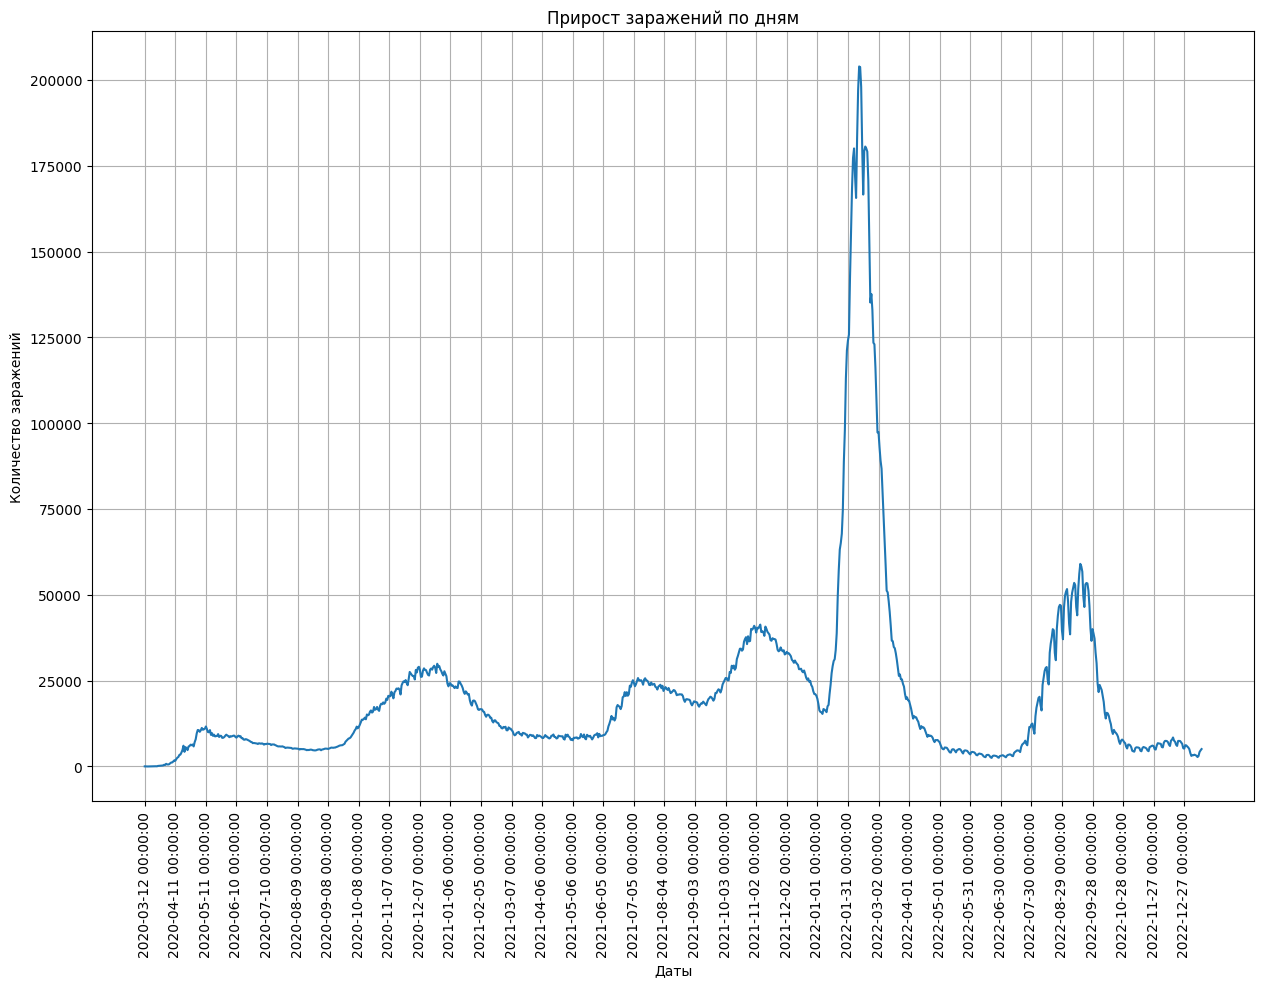

In [234]:
plt.figure(figsize=(15,10))
plt.plot(file['Дата'], file['Заражений за день'])
plt.title("Прирост заражений по дням")
plt.xlabel("Даты")
plt.xticks(range(0,len(file),30), rotation = 90);
plt.ylabel("Количество заражений")
plt.grid()

In [44]:
file['Дата'] = file['Дата'].str.replace('00:00:00', '')

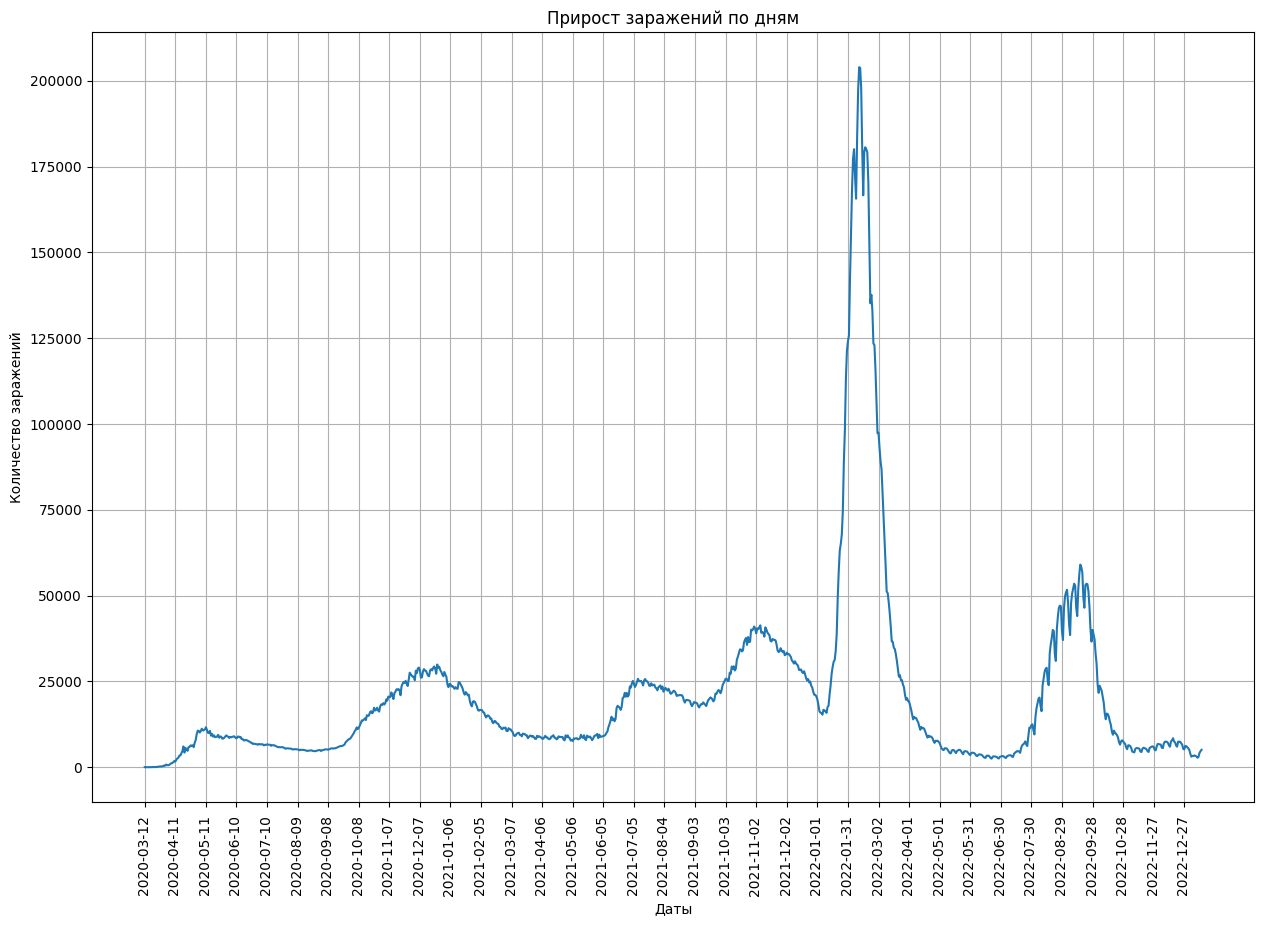

In [45]:
plt.figure(figsize=(15,10))
plt.plot(file['Дата'], file['Заражений за день'])
plt.title("Прирост заражений по дням")
plt.xlabel("Даты")
plt.xticks(range(0,len(file),30), rotation = 90);
plt.ylabel("Количество заражений")
plt.grid()

[21846722.        -1.49157131e-10j -5577323.84223518+6.57441410e+06j
 -3545565.60008133-4.38130918e+06j ...  4484705.84751773-3.39072802e+06j
 -3545565.60008133+4.38130918e+06j -5577323.84223518-6.57441410e+06j]


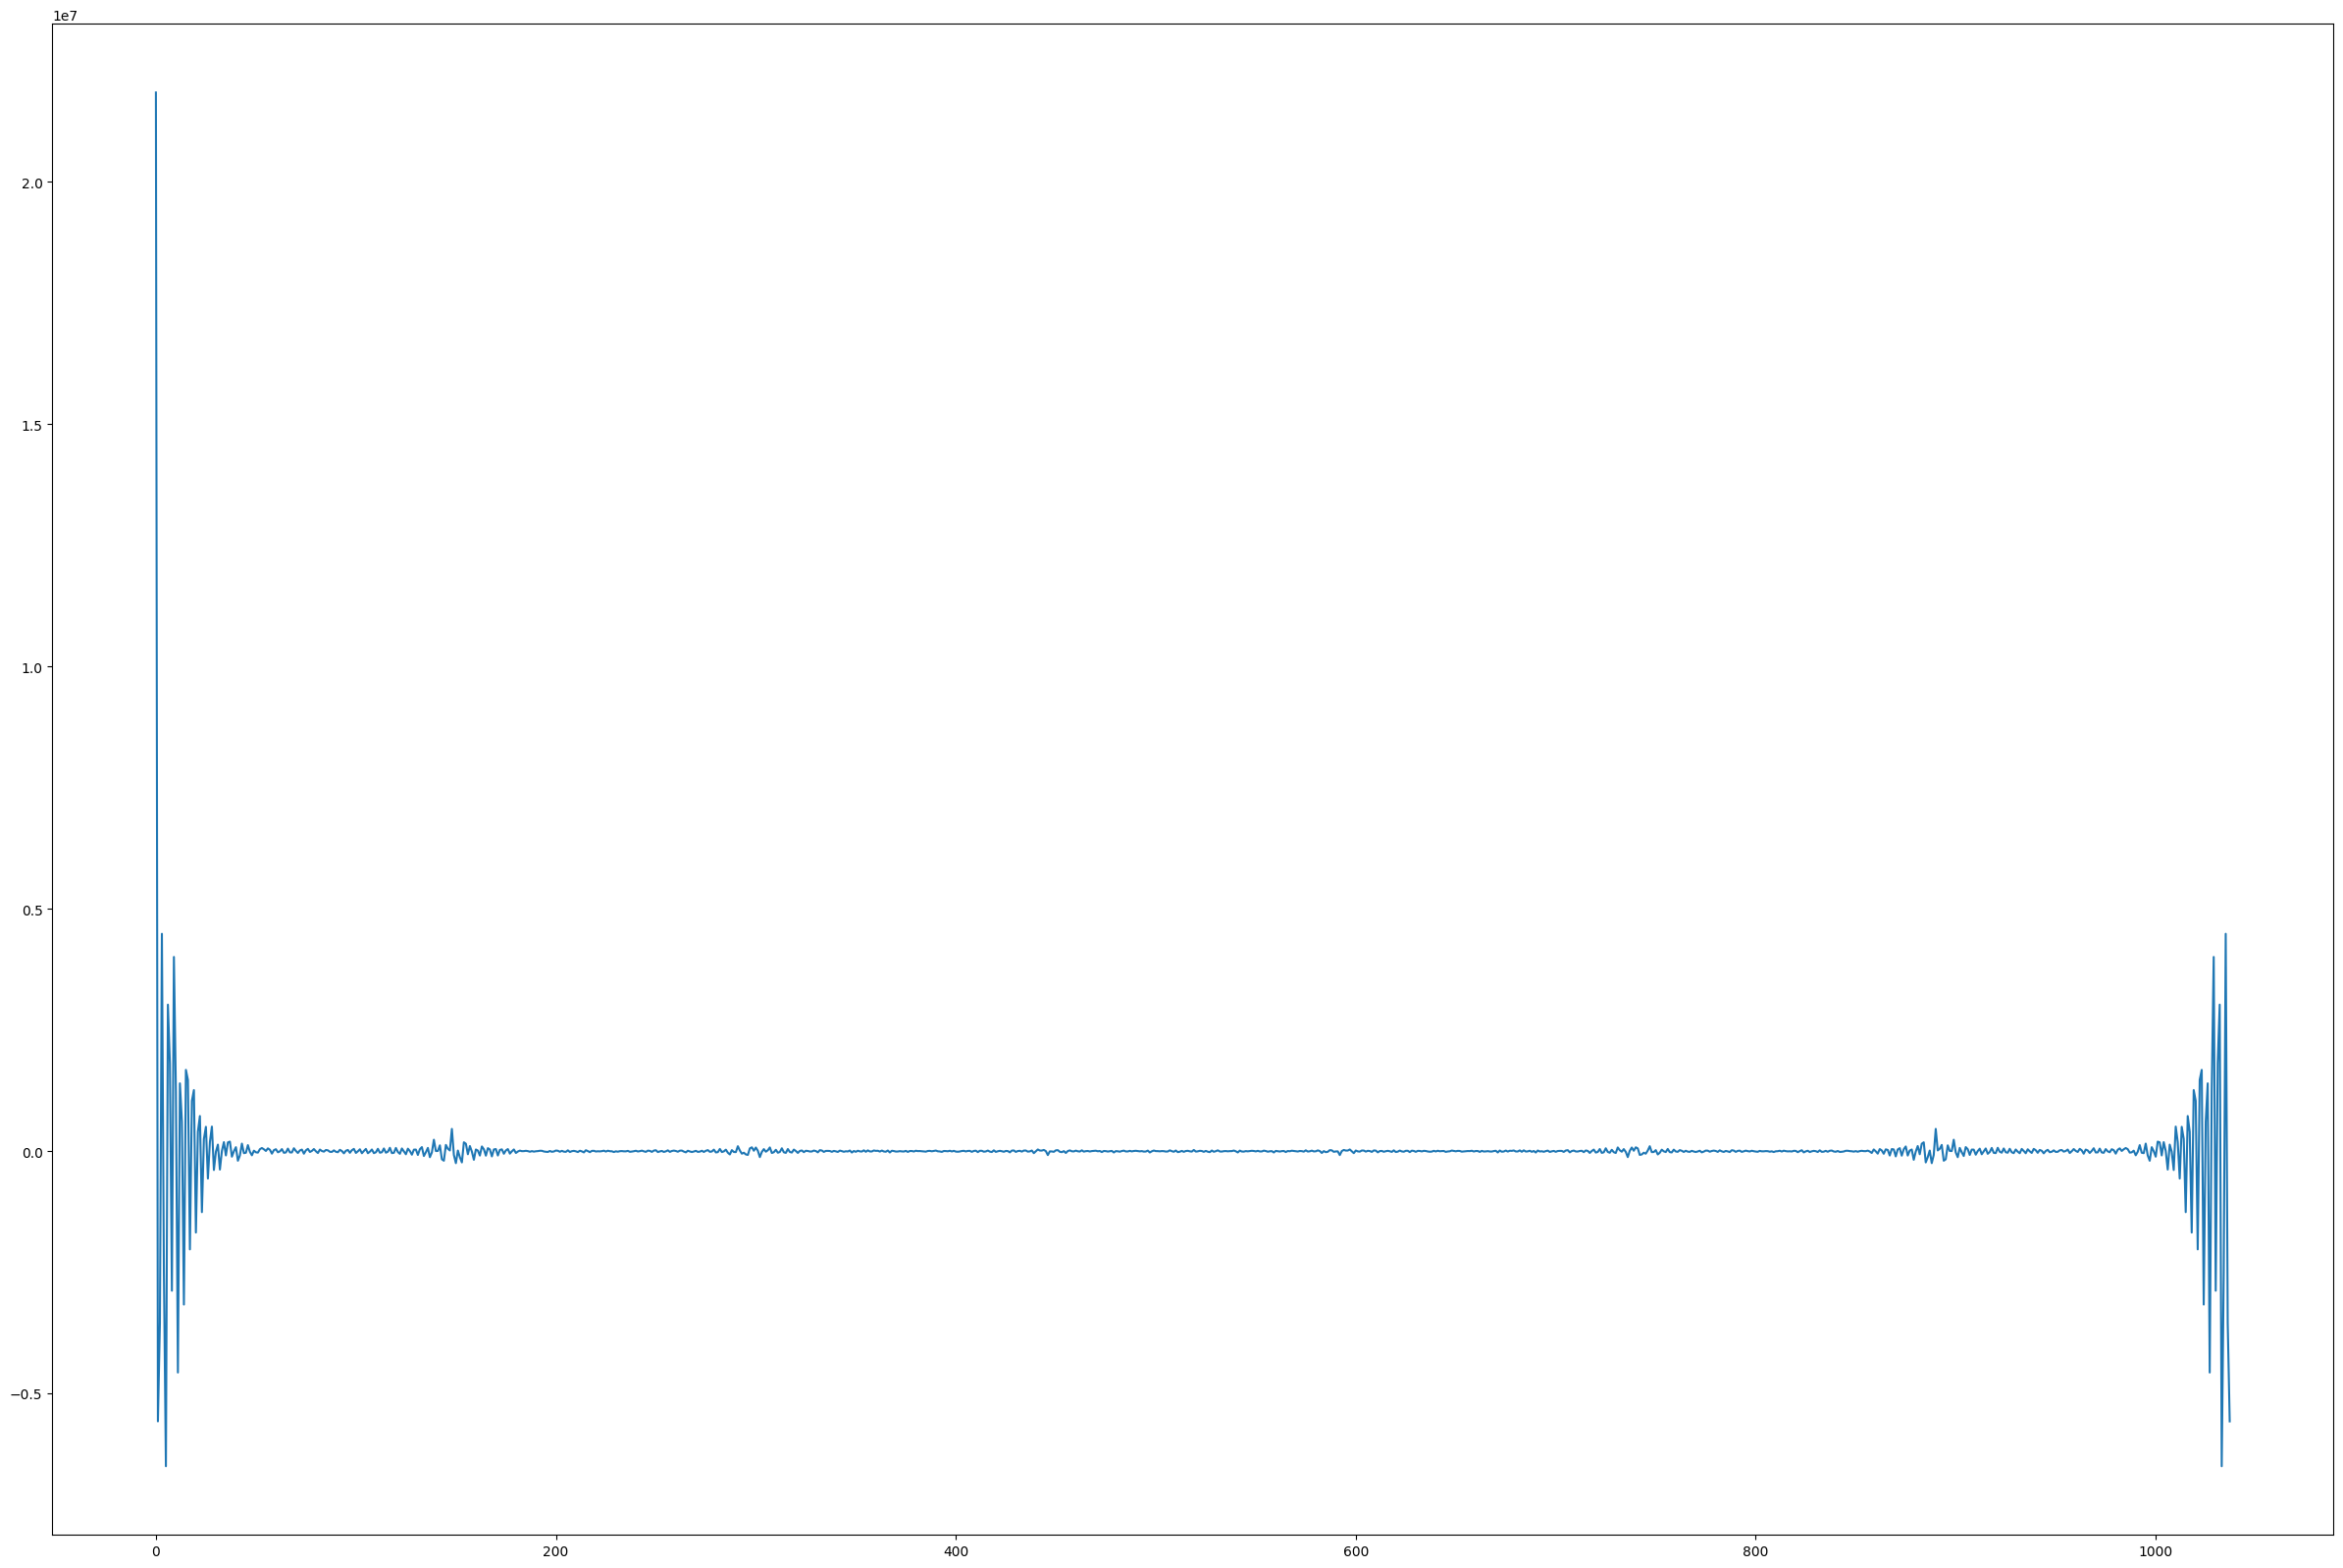

In [56]:
fft = np.fft.fft(file['Заражений за день'])
print(fft)
plt.figure(figsize = (30,20))
plt.plot(fft)

Text(0, 0.5, 'Амплитуда')

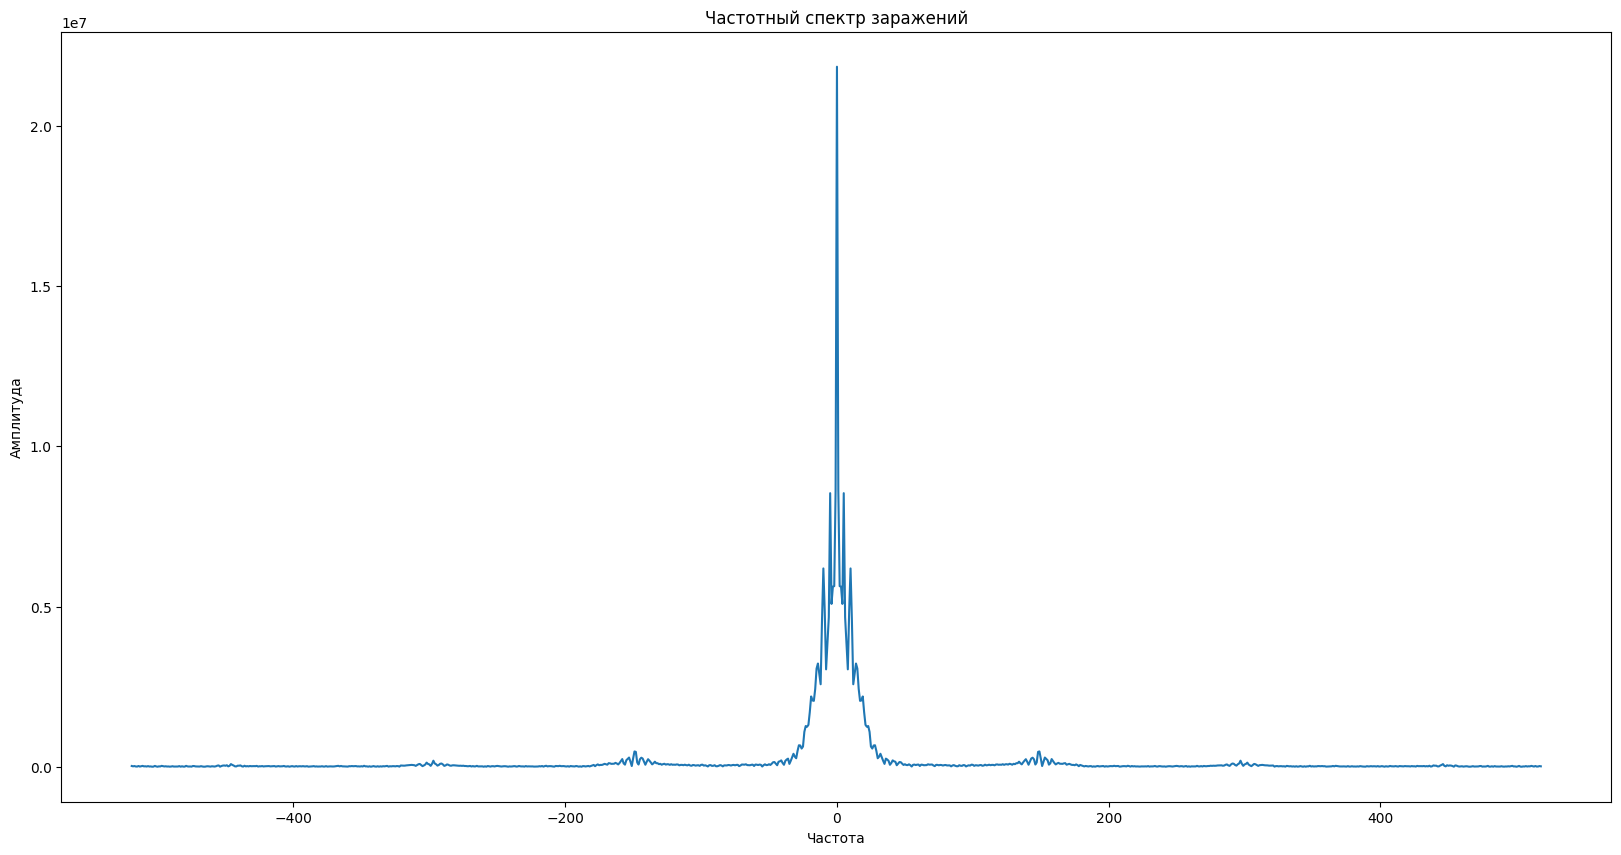

In [87]:
fshift = (np.fft.fftshift(fft))
amplitudes = np.abs(fshift)
plt.figure(figsize = (20,10))
freq = list(map(lambda x: x - round(len(fshift)/2), list(range(len(fshift))))) #оси частот, сдвинутые на основе списка fshift
plt.plot(freq, amplitudes)
plt.title('Частотный спектр заражений')
plt.xlabel('Частота')
plt.ylabel('Амплитуда')

In [119]:
for i in range(round(len(fshift)/2) + 99, len(fshift)): # рассмотрим высокие частоты (где значения по оси х больше 99)
    if fshift[i] > 0.01 * 1e7:
        print(f'Частота, которая присутствует в сигнале: {i - round(len(fshift)/2)}, период равен {len(fshift)/(i - round(len(fshift)/2))}')

Частота, которая присутствует в сигнале: 139, период равен 7.467625899280575
Частота, которая присутствует в сигнале: 142, период равен 7.309859154929577
Частота, которая присутствует в сигнале: 145, период равен 7.158620689655172
Частота, которая присутствует в сигнале: 148, период равен 7.013513513513513
Частота, которая присутствует в сигнале: 154, период равен 6.740259740259741
Частота, которая присутствует в сигнале: 155, период равен 6.696774193548387
Частота, которая присутствует в сигнале: 157, период равен 6.611464968152866
Частота, которая присутствует в сигнале: 291, период равен 3.5670103092783507


По полученному результату видно, что на графике выделяются нихзкочастотные составляющие изменения динамики и есть высокочастотные изменения.Также можно увидеть, что есть изменения с недельной периодичностью. Я думаю, что мы их наблюдаем из-за того, что во время выходных люди практически не обращались к врачам , проводили время в компаниях. Из-за этого за выходные накапливалось большое число заражённых и мы видим изменения недельной периодичности

 Определим даты, соответствующие наивысшим точкам каждой волны заболеваемости

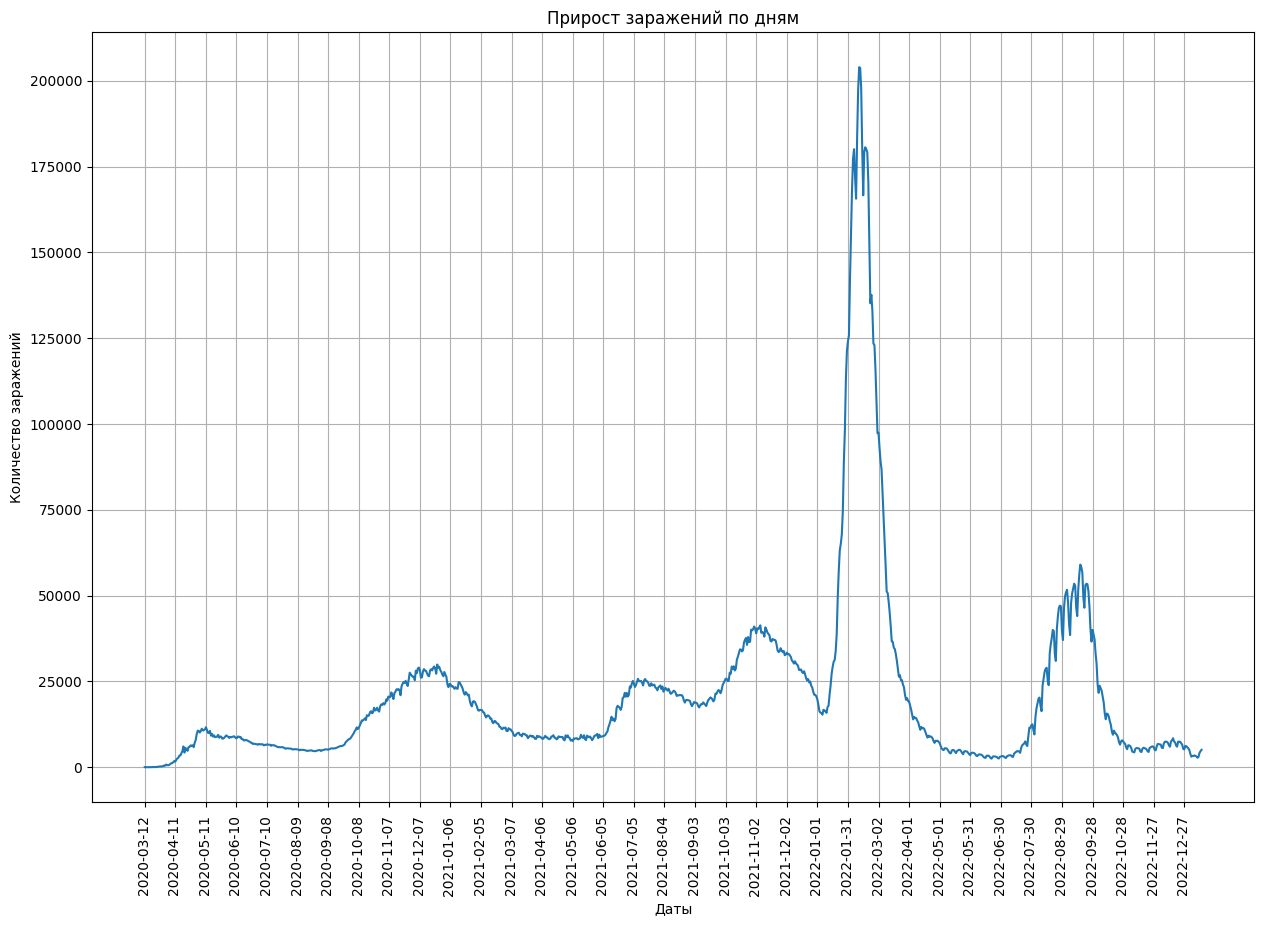

In [169]:
# Приведём ещё раз исходный график
plt.figure(figsize=(15,10))
plt.plot(file['Дата'], file['Заражений за день'])
plt.title("Прирост заражений по дням")
plt.xlabel("Даты")
plt.xticks(range(0,len(file),30), rotation = 90);
plt.ylabel("Количество заражений")
plt.grid()

In [170]:
from scipy.signal import find_peaks #нахождение пиков
from scipy.signal import argrelextrema #нахождение локальных минимумов

In [195]:
new_fshift = fshift.copy()
new_fshift[:round(len(fshift)/2) - 20] = 0 # Вырезаем из сигнала высокие частоты для сглаживания графика
new_fshift[round(len(fshift)/2) + 20:] = 0
f_new_ishift = np.fft.ifftshift(new_fshift)
image_back = np.real(np.fft.ifft(f_new_ishift))
file_new = file.copy()
file_new['Заражений за день'] = image_back

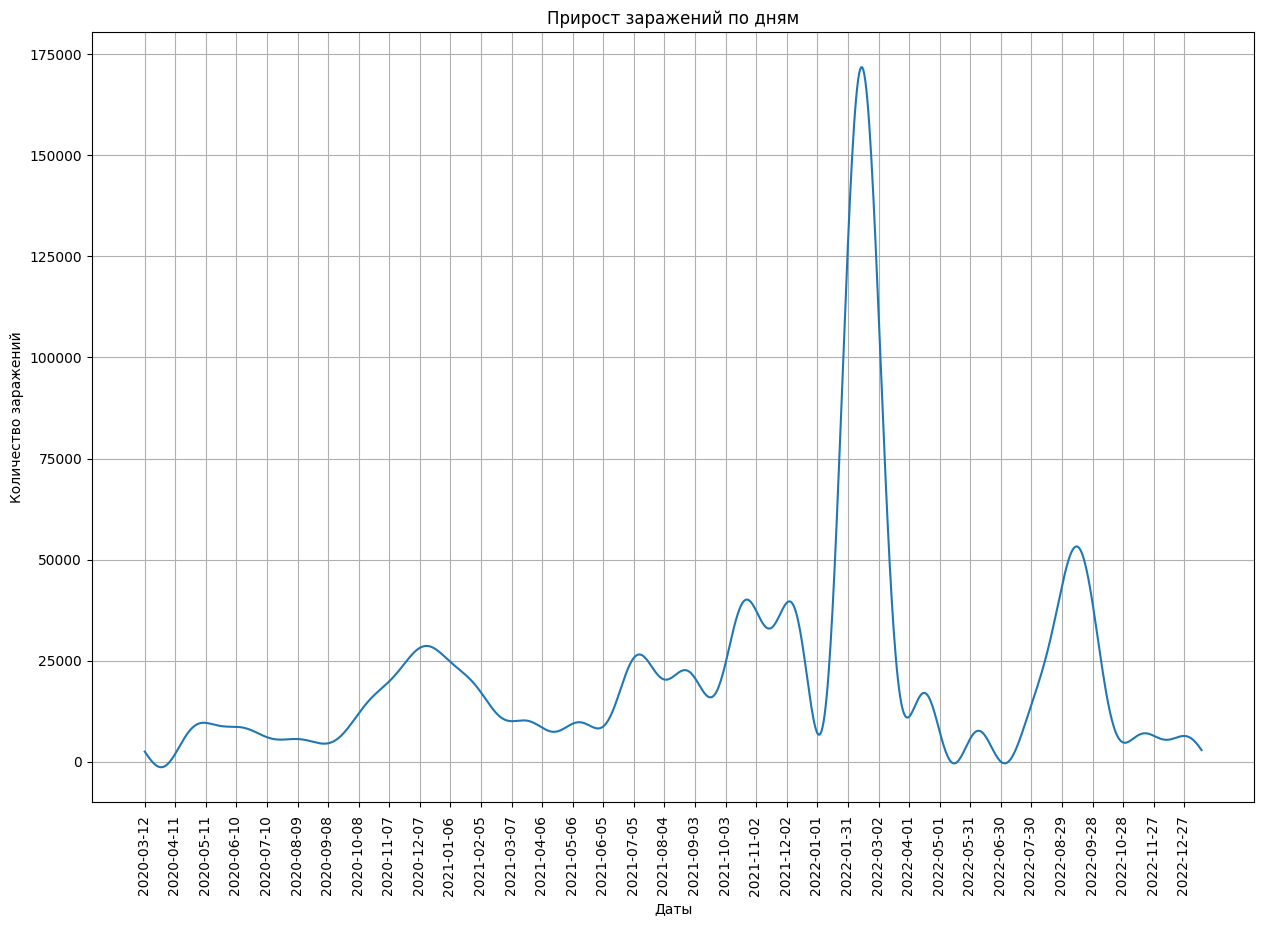

In [196]:
plt.figure(figsize=(15,10))
plt.plot(file['Дата'], file_new['Заражений за день'])
plt.title("Прирост заражений по дням")
plt.xlabel("Даты")
plt.xticks(range(0,len(file),30), rotation = 90);
plt.ylabel("Количество заражений")
plt.grid()

In [211]:
minimum = argrelextrema(np.array(file_new['Заражений за день']), np.less, order = 1)[0]
print(minimum) # поиск локальных минимумов в одномерном массиве.

[  16  133  176  361  401  445  511  555  613  662  748  794  844  962
 1003]


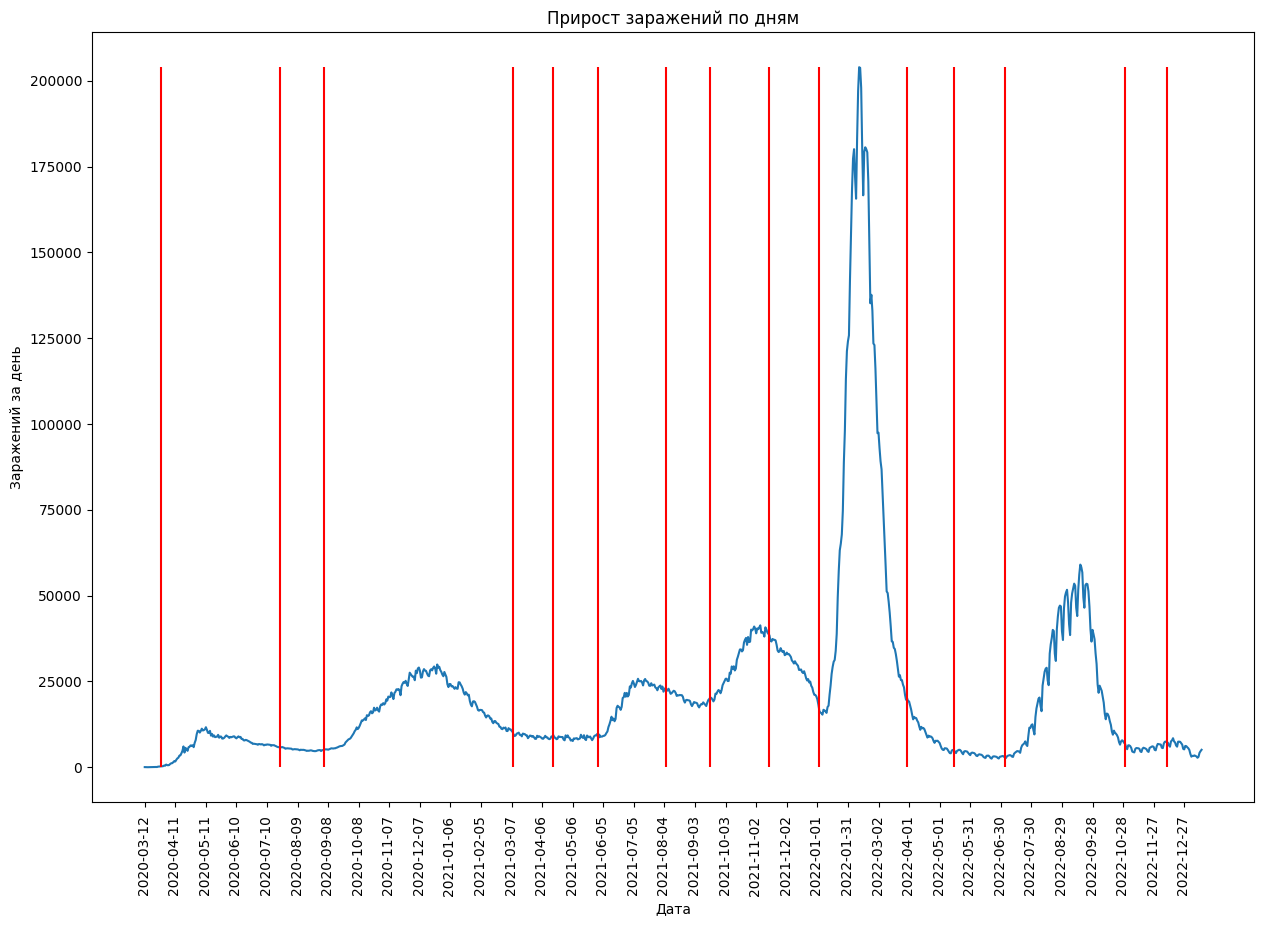

In [212]:
plt.figure(figsize = (15,10))
plt.plot(file['Дата'], file['Заражений за день'])
plt.title("Прирост заражений по дням")
plt.xlabel('Дата')
plt.xticks(range(0,len(file),30), rotation = 90)
plt.ylabel('Заражений за день')
plt.vlines(minimum, ymin = 0, ymax = max(file['Заражений за день']), color = 'r')

In [213]:
# сделаем поиск локальных минимумов ещё раз
minimum_2 = argrelextrema(np.array(file_new['Заражений за день'][mimimum]), np.less, order = 1)[0]
print(minimum[minimum_2])

[176 401 555 662 794]


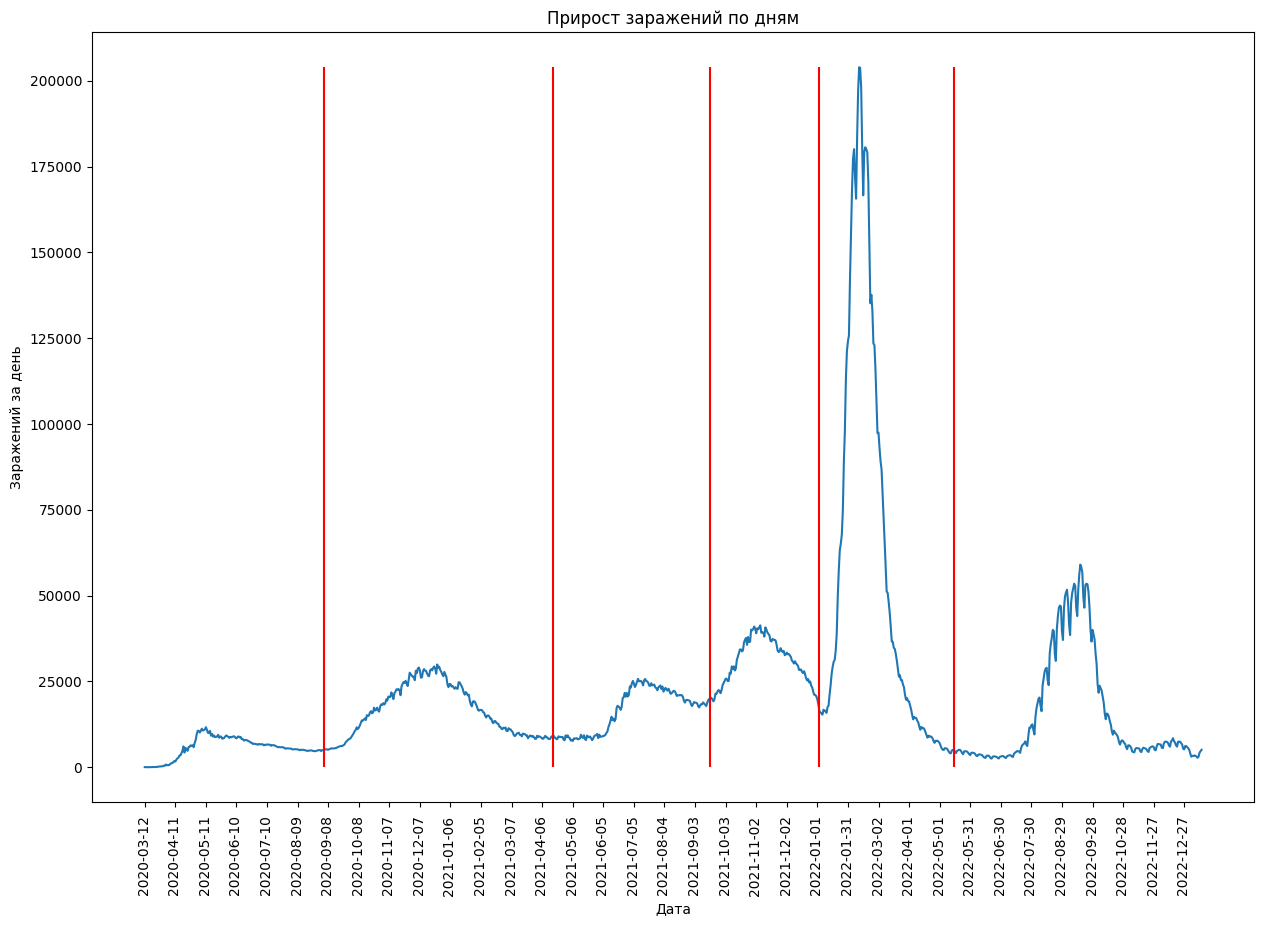

In [215]:
plt.figure(figsize = (15,10))
plt.plot(file['Дата'], file['Заражений за день'])
plt.title("Прирост заражений по дням")
plt.xlabel('Дата')
plt.xticks(range(0,len(file),30), rotation = 90)
plt.ylabel('Заражений за день')
plt.vlines(minimum[minimum_2], ymin = 0, ymax = max(file['Заражений за день']), color = 'r')

In [224]:
print(len(minimum_2))
print(minimum[minimum_2])

5
[176 401 555 662 794]


In [228]:
max_value = []
max_date = []
threshold = 0
for i in range(len(minimum_2) + 1):
    if i != len(minimum_2):
        max_value.append(max(file['Заражений за день'][threshold:minimum[minimum_2][i]]))
        max_date.append(file['Дата'][list(file['Заражений за день']).index(max(file['Заражений за день'][threshold:minimum[minimum_2][i]]))])
        threshold = minimum[minimum_2][i]
    else:
        max_value.append(max(file['Заражений за день'][i_left:]))
        max_date.append(file['Дата'][list(file['Заражений за день']).index(max(file['Заражений за день'][i_left:]))])
    print(f'Максимальное число заражений в {i+1} волну составило: {max_value[i]}. Это было {max_date[i]}')

Максимальное число заражений в 1 волну составило: 11656. Это было 2020-05-11 
Максимальное число заражений в 2 волну составило: 29935. Это было 2020-12-24 
Максимальное число заражений в 3 волну составило: 25766. Это было 2021-07-09 
Максимальное число заражений в 4 волну составило: 41335. Это было 2021-11-06 
Максимальное число заражений в 5 волну составило: 203949. Это было 2022-02-11 
Максимальное число заражений в 6 волну составило: 59035. Это было 2022-09-16 


Text(0, 0.5, 'Заражений за день')

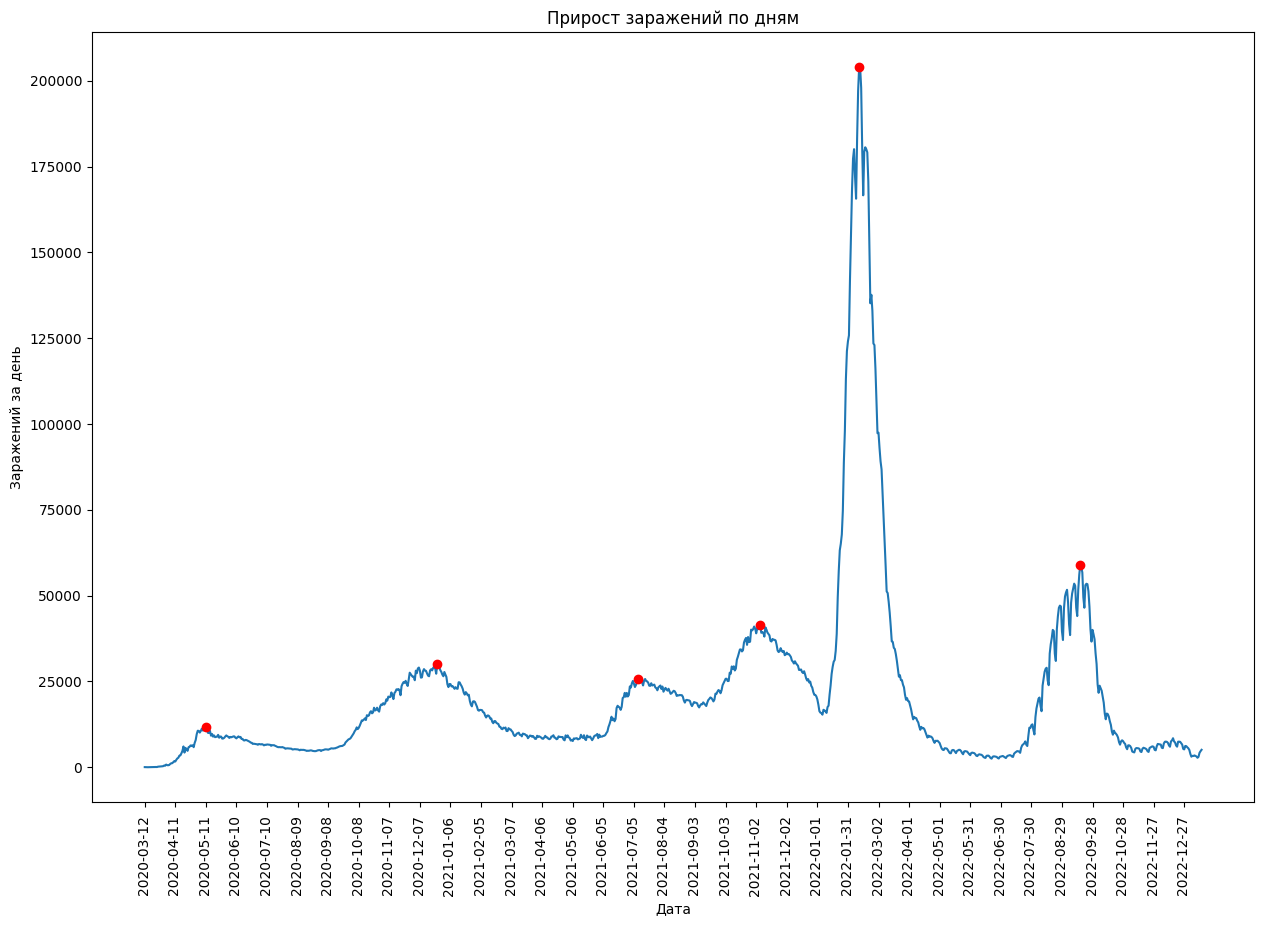

In [229]:
plt.figure(figsize = (15,10))
plt.plot(file['Дата'], file['Заражений за день'])
plt.plot(max_date, max_value, 'ro')
plt.title("Прирост заражений по дням")
plt.xlabel('Дата')
plt.xticks(range(0,len(file),30), rotation = 90)
plt.ylabel('Заражений за день')

In [ ]:
0